## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import statsModel
import scrapbook as sb 
import torch 
import statsModel
import baselineModels
import bostonDataset
import dataset 
from torch.utils.data import random_split 
from sklearn.model_selection import train_test_split

## Import Dataset 


In [3]:
n_features = 13
n_samples= 506
n_target = 1 
X,Y = bostonDataset.boston_data()

         X1        X2        X3        X4        X5        X6        X7  \
0 -0.419782  0.284830 -1.287909 -0.272599 -0.144217  0.413672 -0.120013   
1 -0.417339 -0.487722 -0.593381 -0.272599 -0.740262  0.194274  0.367166   
2 -0.417342 -0.487722 -0.593381 -0.272599 -0.740262  1.282714 -0.265812   
3 -0.416750 -0.487722 -1.306878 -0.272599 -0.835284  1.016303 -0.809889   
4 -0.412482 -0.487722 -1.306878 -0.272599 -0.835284  1.228577 -0.511180   

         X8        X9       X10       X11       X12       X13         Y  
0  0.140214 -0.982843 -0.666608 -1.459000  0.441052 -1.075562  0.159686  
1  0.557160 -0.867883 -0.987329 -0.303094  0.441052 -0.492439 -0.101524  
2  0.557160 -0.867883 -0.987329 -0.303094  0.396427 -1.208727  1.324247  
3  1.077737 -0.752922 -1.106115  0.113032  0.416163 -1.361517  1.182758  
4  1.077737 -0.752922 -1.106115  0.113032  0.441052 -1.026501  1.487503  


In [4]:
# Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Stats Model 



No handles with labels found to put in legend.


                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.769
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              99.87
Date:                Tue, 17 May 2022   Prob (F-statistic):                   2.05e-115
Time:                        20:20:37   Log-Likelihood:                         -280.67
No. Observations:                 404   AIC:                                      587.3
Df Residuals:                     391   BIC:                                      639.4
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

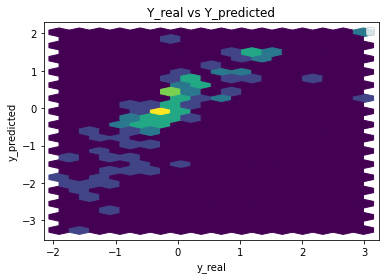

Performance Metrics
Mean Squared Error: 0.39230782927607494
Mean Absolute Error: 0.4357598175014781
Manhattan distance: 44.44750138515078
Euclidean distance: 6.325772568323939


In [5]:
coefficients , y_pred =statsModel.statsModel(X_train,y_train,X_test,y_test)
#Store MSE Value 
sb.glue("Coefficients",coefficients)

# Catboost Model 

In [6]:
mae_cb = baselineModels.catboost(X_train,y_train,X_test,y_test)
#Store MSE Value
sb.glue("Catboost MAE",mae_cb)
print(mae_cb)

Learning rate set to 0.033215


0:	learn: 0.9869898	total: 58.9ms	remaining: 58.8s
1:	learn: 0.9667847	total: 60.1ms	remaining: 30s
2:	learn: 0.9462328	total: 61.1ms	remaining: 20.3s
3:	learn: 0.9303055	total: 61.9ms	remaining: 15.4s
4:	learn: 0.9139518	total: 63ms	remaining: 12.5s
5:	learn: 0.9000851	total: 64ms	remaining: 10.6s
6:	learn: 0.8830156	total: 65.1ms	remaining: 9.24s
7:	learn: 0.8666434	total: 66ms	remaining: 8.18s
8:	learn: 0.8509094	total: 66.9ms	remaining: 7.37s
9:	learn: 0.8339947	total: 67.8ms	remaining: 6.71s
10:	learn: 0.8176745	total: 68.6ms	remaining: 6.17s
11:	learn: 0.8036074	total: 69.5ms	remaining: 5.72s
12:	learn: 0.7887961	total: 70.3ms	remaining: 5.34s
13:	learn: 0.7732710	total: 71.1ms	remaining: 5.01s
14:	learn: 0.7599931	total: 72.2ms	remaining: 4.74s
15:	learn: 0.7451742	total: 73.2ms	remaining: 4.5s
16:	learn: 0.7332420	total: 74ms	remaining: 4.28s
17:	learn: 0.7205870	total: 74.8ms	remaining: 4.08s
18:	learn: 0.7075587	total: 75.6ms	remaining: 3.9s
19:	learn: 0.6938726	total: 76.4ms

27:	learn: 0.6108792	total: 82.3ms	remaining: 2.86s
28:	learn: 0.6014634	total: 83.1ms	remaining: 2.78s
29:	learn: 0.5910829	total: 84ms	remaining: 2.72s
30:	learn: 0.5823262	total: 84.8ms	remaining: 2.65s
31:	learn: 0.5731852	total: 85.6ms	remaining: 2.59s
32:	learn: 0.5649748	total: 86.4ms	remaining: 2.53s
33:	learn: 0.5581618	total: 87.2ms	remaining: 2.48s
34:	learn: 0.5498598	total: 88ms	remaining: 2.43s
35:	learn: 0.5421043	total: 88.8ms	remaining: 2.38s
36:	learn: 0.5356034	total: 89.3ms	remaining: 2.32s
37:	learn: 0.5286518	total: 90ms	remaining: 2.28s
38:	learn: 0.5212507	total: 90.8ms	remaining: 2.24s
39:	learn: 0.5144756	total: 92.2ms	remaining: 2.21s
40:	learn: 0.5073901	total: 93.1ms	remaining: 2.18s
41:	learn: 0.5001710	total: 93.9ms	remaining: 2.14s
42:	learn: 0.4939207	total: 94.7ms	remaining: 2.11s
43:	learn: 0.4871138	total: 95.4ms	remaining: 2.07s
44:	learn: 0.4819994	total: 96.2ms	remaining: 2.04s
45:	learn: 0.4765041	total: 97ms	remaining: 2.01s
46:	learn: 0.4705900

121:	learn: 0.2758227	total: 158ms	remaining: 1.14s
122:	learn: 0.2744155	total: 159ms	remaining: 1.14s
123:	learn: 0.2736008	total: 160ms	remaining: 1.13s
124:	learn: 0.2726142	total: 161ms	remaining: 1.13s
125:	learn: 0.2716312	total: 162ms	remaining: 1.12s
126:	learn: 0.2701797	total: 163ms	remaining: 1.12s
127:	learn: 0.2691347	total: 164ms	remaining: 1.11s
128:	learn: 0.2681267	total: 165ms	remaining: 1.11s
129:	learn: 0.2671096	total: 165ms	remaining: 1.11s
130:	learn: 0.2661198	total: 166ms	remaining: 1.1s
131:	learn: 0.2649954	total: 167ms	remaining: 1.1s
132:	learn: 0.2643344	total: 168ms	remaining: 1.09s
133:	learn: 0.2632398	total: 169ms	remaining: 1.09s
134:	learn: 0.2624104	total: 170ms	remaining: 1.09s
135:	learn: 0.2614711	total: 170ms	remaining: 1.08s
136:	learn: 0.2601481	total: 171ms	remaining: 1.08s
137:	learn: 0.2589627	total: 172ms	remaining: 1.07s
138:	learn: 0.2581753	total: 173ms	remaining: 1.07s
139:	learn: 0.2574252	total: 173ms	remaining: 1.06s
140:	learn: 0.

161:	learn: 0.2396033	total: 191ms	remaining: 989ms
162:	learn: 0.2387554	total: 192ms	remaining: 987ms
163:	learn: 0.2383162	total: 193ms	remaining: 983ms
164:	learn: 0.2375035	total: 194ms	remaining: 980ms
165:	learn: 0.2368946	total: 194ms	remaining: 977ms
166:	learn: 0.2359630	total: 195ms	remaining: 974ms
167:	learn: 0.2355784	total: 196ms	remaining: 971ms
168:	learn: 0.2349093	total: 197ms	remaining: 967ms
169:	learn: 0.2343173	total: 198ms	remaining: 964ms
170:	learn: 0.2336724	total: 198ms	remaining: 961ms
171:	learn: 0.2328838	total: 199ms	remaining: 960ms
172:	learn: 0.2322046	total: 200ms	remaining: 957ms
173:	learn: 0.2314448	total: 201ms	remaining: 954ms
174:	learn: 0.2306297	total: 202ms	remaining: 952ms
175:	learn: 0.2300175	total: 203ms	remaining: 949ms
176:	learn: 0.2292816	total: 203ms	remaining: 946ms
177:	learn: 0.2286701	total: 205ms	remaining: 946ms
178:	learn: 0.2280964	total: 206ms	remaining: 944ms
179:	learn: 0.2274782	total: 207ms	remaining: 941ms
180:	learn: 

231:	learn: 0.2021249	total: 248ms	remaining: 822ms
232:	learn: 0.2016771	total: 249ms	remaining: 820ms
233:	learn: 0.2014413	total: 250ms	remaining: 818ms
234:	learn: 0.2010835	total: 251ms	remaining: 816ms
235:	learn: 0.2006086	total: 252ms	remaining: 815ms
236:	learn: 0.2000421	total: 253ms	remaining: 813ms
237:	learn: 0.1997791	total: 253ms	remaining: 811ms
238:	learn: 0.1995191	total: 254ms	remaining: 809ms
239:	learn: 0.1991173	total: 255ms	remaining: 808ms
240:	learn: 0.1986949	total: 256ms	remaining: 806ms
241:	learn: 0.1983320	total: 257ms	remaining: 804ms
242:	learn: 0.1980929	total: 257ms	remaining: 802ms
243:	learn: 0.1978237	total: 258ms	remaining: 800ms
244:	learn: 0.1976174	total: 259ms	remaining: 798ms
245:	learn: 0.1974386	total: 260ms	remaining: 796ms
246:	learn: 0.1970994	total: 261ms	remaining: 794ms
247:	learn: 0.1965532	total: 261ms	remaining: 792ms
248:	learn: 0.1961552	total: 262ms	remaining: 790ms
249:	learn: 0.1958798	total: 263ms	remaining: 789ms
250:	learn: 

260:	learn: 0.1918473	total: 272ms	remaining: 770ms
261:	learn: 0.1913940	total: 273ms	remaining: 769ms
262:	learn: 0.1911864	total: 274ms	remaining: 768ms
263:	learn: 0.1905288	total: 275ms	remaining: 766ms
264:	learn: 0.1903151	total: 276ms	remaining: 764ms
265:	learn: 0.1901220	total: 276ms	remaining: 763ms
266:	learn: 0.1896233	total: 277ms	remaining: 762ms
267:	learn: 0.1890674	total: 278ms	remaining: 760ms
268:	learn: 0.1888408	total: 279ms	remaining: 758ms
269:	learn: 0.1886380	total: 280ms	remaining: 756ms
270:	learn: 0.1881887	total: 281ms	remaining: 755ms
271:	learn: 0.1876060	total: 282ms	remaining: 754ms
272:	learn: 0.1873041	total: 282ms	remaining: 752ms
273:	learn: 0.1869000	total: 283ms	remaining: 751ms
274:	learn: 0.1865946	total: 284ms	remaining: 749ms
275:	learn: 0.1863319	total: 285ms	remaining: 748ms
276:	learn: 0.1861500	total: 286ms	remaining: 746ms
277:	learn: 0.1857830	total: 287ms	remaining: 744ms
278:	learn: 0.1853905	total: 288ms	remaining: 743ms
279:	learn: 

352:	learn: 0.1603372	total: 348ms	remaining: 638ms
353:	learn: 0.1602169	total: 349ms	remaining: 637ms
354:	learn: 0.1598175	total: 350ms	remaining: 636ms
355:	learn: 0.1594340	total: 351ms	remaining: 635ms
356:	learn: 0.1590652	total: 352ms	remaining: 633ms
357:	learn: 0.1585224	total: 353ms	remaining: 632ms
358:	learn: 0.1583662	total: 353ms	remaining: 631ms
359:	learn: 0.1579105	total: 354ms	remaining: 630ms
360:	learn: 0.1574744	total: 355ms	remaining: 628ms
361:	learn: 0.1571038	total: 356ms	remaining: 627ms
362:	learn: 0.1570035	total: 356ms	remaining: 626ms
363:	learn: 0.1565786	total: 357ms	remaining: 624ms
364:	learn: 0.1562696	total: 358ms	remaining: 623ms
365:	learn: 0.1559336	total: 359ms	remaining: 622ms
366:	learn: 0.1558817	total: 360ms	remaining: 621ms
367:	learn: 0.1556359	total: 361ms	remaining: 619ms
368:	learn: 0.1552376	total: 361ms	remaining: 618ms
369:	learn: 0.1547308	total: 362ms	remaining: 617ms
370:	learn: 0.1544136	total: 363ms	remaining: 616ms
371:	learn: 

392:	learn: 0.1488542	total: 381ms	remaining: 589ms
393:	learn: 0.1487966	total: 382ms	remaining: 588ms
394:	learn: 0.1484837	total: 383ms	remaining: 586ms
395:	learn: 0.1481444	total: 384ms	remaining: 585ms
396:	learn: 0.1480743	total: 385ms	remaining: 584ms
397:	learn: 0.1476006	total: 386ms	remaining: 583ms
398:	learn: 0.1473117	total: 386ms	remaining: 582ms
399:	learn: 0.1469804	total: 387ms	remaining: 581ms
400:	learn: 0.1467118	total: 388ms	remaining: 580ms
401:	learn: 0.1463736	total: 389ms	remaining: 578ms
402:	learn: 0.1460368	total: 390ms	remaining: 577ms
403:	learn: 0.1457981	total: 391ms	remaining: 577ms
404:	learn: 0.1457198	total: 392ms	remaining: 576ms
405:	learn: 0.1455740	total: 393ms	remaining: 575ms
406:	learn: 0.1451922	total: 393ms	remaining: 573ms
407:	learn: 0.1448236	total: 394ms	remaining: 572ms
408:	learn: 0.1446888	total: 395ms	remaining: 571ms
409:	learn: 0.1443881	total: 396ms	remaining: 570ms
410:	learn: 0.1441419	total: 397ms	remaining: 568ms
411:	learn: 

461:	learn: 0.1330856	total: 438ms	remaining: 510ms
462:	learn: 0.1326820	total: 439ms	remaining: 509ms
463:	learn: 0.1322902	total: 440ms	remaining: 508ms
464:	learn: 0.1319351	total: 441ms	remaining: 507ms
465:	learn: 0.1316396	total: 441ms	remaining: 506ms
466:	learn: 0.1315013	total: 442ms	remaining: 505ms
467:	learn: 0.1311827	total: 443ms	remaining: 504ms
468:	learn: 0.1309719	total: 444ms	remaining: 503ms
469:	learn: 0.1306631	total: 446ms	remaining: 503ms
470:	learn: 0.1303926	total: 447ms	remaining: 502ms
471:	learn: 0.1301308	total: 447ms	remaining: 501ms
472:	learn: 0.1298300	total: 448ms	remaining: 499ms
473:	learn: 0.1295722	total: 449ms	remaining: 498ms
474:	learn: 0.1292733	total: 450ms	remaining: 497ms
475:	learn: 0.1290660	total: 451ms	remaining: 496ms
476:	learn: 0.1289753	total: 451ms	remaining: 495ms
477:	learn: 0.1287840	total: 452ms	remaining: 494ms
478:	learn: 0.1285826	total: 453ms	remaining: 493ms
479:	learn: 0.1283500	total: 454ms	remaining: 492ms
480:	learn: 

488:	learn: 0.1264713	total: 462ms	remaining: 483ms
489:	learn: 0.1261738	total: 463ms	remaining: 482ms
490:	learn: 0.1259947	total: 464ms	remaining: 481ms
491:	learn: 0.1259517	total: 464ms	remaining: 479ms
492:	learn: 0.1257057	total: 465ms	remaining: 478ms
493:	learn: 0.1255384	total: 466ms	remaining: 477ms
494:	learn: 0.1255176	total: 467ms	remaining: 476ms
495:	learn: 0.1252293	total: 468ms	remaining: 475ms
496:	learn: 0.1249027	total: 468ms	remaining: 474ms
497:	learn: 0.1246924	total: 469ms	remaining: 473ms
498:	learn: 0.1246721	total: 470ms	remaining: 472ms
499:	learn: 0.1246264	total: 471ms	remaining: 471ms
500:	learn: 0.1245839	total: 472ms	remaining: 470ms
501:	learn: 0.1243475	total: 472ms	remaining: 469ms
502:	learn: 0.1242000	total: 473ms	remaining: 467ms
503:	learn: 0.1240187	total: 474ms	remaining: 466ms
504:	learn: 0.1238424	total: 475ms	remaining: 465ms
505:	learn: 0.1238232	total: 476ms	remaining: 464ms
506:	learn: 0.1235626	total: 476ms	remaining: 463ms
507:	learn: 

579:	learn: 0.1099395	total: 538ms	remaining: 390ms
580:	learn: 0.1098917	total: 539ms	remaining: 389ms
581:	learn: 0.1096287	total: 540ms	remaining: 388ms
582:	learn: 0.1095104	total: 540ms	remaining: 387ms
583:	learn: 0.1093096	total: 541ms	remaining: 385ms
584:	learn: 0.1091063	total: 542ms	remaining: 385ms
585:	learn: 0.1088983	total: 543ms	remaining: 384ms
586:	learn: 0.1088864	total: 544ms	remaining: 383ms
587:	learn: 0.1087226	total: 544ms	remaining: 382ms
588:	learn: 0.1087044	total: 545ms	remaining: 381ms
589:	learn: 0.1086795	total: 546ms	remaining: 380ms
590:	learn: 0.1086572	total: 547ms	remaining: 379ms
591:	learn: 0.1084212	total: 548ms	remaining: 378ms
592:	learn: 0.1082376	total: 549ms	remaining: 377ms
593:	learn: 0.1080132	total: 550ms	remaining: 376ms
594:	learn: 0.1077656	total: 550ms	remaining: 375ms
595:	learn: 0.1075826	total: 551ms	remaining: 374ms
596:	learn: 0.1073768	total: 552ms	remaining: 373ms
597:	learn: 0.1073513	total: 553ms	remaining: 372ms
598:	learn: 

618:	learn: 0.1050143	total: 571ms	remaining: 351ms
619:	learn: 0.1048280	total: 572ms	remaining: 350ms
620:	learn: 0.1047892	total: 573ms	remaining: 349ms
621:	learn: 0.1046102	total: 573ms	remaining: 348ms
622:	learn: 0.1044195	total: 574ms	remaining: 347ms
623:	learn: 0.1042754	total: 575ms	remaining: 347ms
624:	learn: 0.1041819	total: 576ms	remaining: 346ms
625:	learn: 0.1038854	total: 577ms	remaining: 345ms
626:	learn: 0.1036722	total: 578ms	remaining: 344ms
627:	learn: 0.1035534	total: 578ms	remaining: 343ms
628:	learn: 0.1033514	total: 579ms	remaining: 342ms
629:	learn: 0.1032593	total: 580ms	remaining: 341ms
630:	learn: 0.1032493	total: 581ms	remaining: 340ms
631:	learn: 0.1030632	total: 581ms	remaining: 339ms
632:	learn: 0.1027773	total: 582ms	remaining: 338ms
633:	learn: 0.1026272	total: 583ms	remaining: 337ms
634:	learn: 0.1023868	total: 584ms	remaining: 336ms
635:	learn: 0.1022140	total: 585ms	remaining: 335ms
636:	learn: 0.1021106	total: 586ms	remaining: 334ms
637:	learn: 

687:	learn: 0.0945496	total: 628ms	remaining: 285ms
688:	learn: 0.0945187	total: 629ms	remaining: 284ms
689:	learn: 0.0944152	total: 630ms	remaining: 283ms
690:	learn: 0.0943619	total: 631ms	remaining: 282ms
691:	learn: 0.0942084	total: 632ms	remaining: 281ms
692:	learn: 0.0941381	total: 632ms	remaining: 280ms
693:	learn: 0.0939859	total: 633ms	remaining: 279ms
694:	learn: 0.0937621	total: 634ms	remaining: 278ms
695:	learn: 0.0936411	total: 635ms	remaining: 277ms
696:	learn: 0.0935983	total: 636ms	remaining: 276ms
697:	learn: 0.0935333	total: 636ms	remaining: 275ms
698:	learn: 0.0934848	total: 637ms	remaining: 274ms
699:	learn: 0.0933280	total: 638ms	remaining: 273ms
700:	learn: 0.0931693	total: 639ms	remaining: 272ms
701:	learn: 0.0930464	total: 640ms	remaining: 271ms
702:	learn: 0.0928667	total: 640ms	remaining: 271ms
703:	learn: 0.0927029	total: 641ms	remaining: 270ms
704:	learn: 0.0924628	total: 642ms	remaining: 269ms
705:	learn: 0.0923886	total: 643ms	remaining: 268ms
706:	learn: 

715:	learn: 0.0910186	total: 652ms	remaining: 258ms
716:	learn: 0.0909212	total: 653ms	remaining: 258ms
717:	learn: 0.0908365	total: 653ms	remaining: 257ms
718:	learn: 0.0907169	total: 654ms	remaining: 256ms
719:	learn: 0.0905930	total: 655ms	remaining: 255ms
720:	learn: 0.0904465	total: 656ms	remaining: 254ms
721:	learn: 0.0903304	total: 657ms	remaining: 253ms
722:	learn: 0.0901286	total: 657ms	remaining: 252ms
723:	learn: 0.0899885	total: 658ms	remaining: 251ms
724:	learn: 0.0899378	total: 659ms	remaining: 250ms
725:	learn: 0.0898463	total: 660ms	remaining: 249ms
726:	learn: 0.0896714	total: 661ms	remaining: 248ms
727:	learn: 0.0896066	total: 661ms	remaining: 247ms
728:	learn: 0.0894936	total: 662ms	remaining: 246ms
729:	learn: 0.0893923	total: 663ms	remaining: 245ms
730:	learn: 0.0892332	total: 664ms	remaining: 244ms
731:	learn: 0.0890751	total: 665ms	remaining: 243ms
732:	learn: 0.0888515	total: 665ms	remaining: 242ms
733:	learn: 0.0888235	total: 666ms	remaining: 241ms
734:	learn: 

805:	learn: 0.0796656	total: 728ms	remaining: 175ms
806:	learn: 0.0795514	total: 729ms	remaining: 174ms
807:	learn: 0.0793843	total: 730ms	remaining: 173ms
808:	learn: 0.0792904	total: 730ms	remaining: 172ms
809:	learn: 0.0791560	total: 731ms	remaining: 172ms
810:	learn: 0.0790295	total: 732ms	remaining: 171ms
811:	learn: 0.0789270	total: 733ms	remaining: 170ms
812:	learn: 0.0789065	total: 734ms	remaining: 169ms
813:	learn: 0.0787227	total: 735ms	remaining: 168ms
814:	learn: 0.0786026	total: 736ms	remaining: 167ms
815:	learn: 0.0785869	total: 736ms	remaining: 166ms
816:	learn: 0.0785026	total: 737ms	remaining: 165ms
817:	learn: 0.0784140	total: 738ms	remaining: 164ms
818:	learn: 0.0782951	total: 739ms	remaining: 163ms
819:	learn: 0.0782332	total: 740ms	remaining: 162ms
820:	learn: 0.0780833	total: 740ms	remaining: 161ms
821:	learn: 0.0779913	total: 741ms	remaining: 160ms
822:	learn: 0.0779197	total: 742ms	remaining: 160ms
823:	learn: 0.0778022	total: 743ms	remaining: 159ms
824:	learn: 

846:	learn: 0.0750610	total: 762ms	remaining: 138ms
847:	learn: 0.0748694	total: 763ms	remaining: 137ms
848:	learn: 0.0747597	total: 763ms	remaining: 136ms
849:	learn: 0.0745640	total: 764ms	remaining: 135ms
850:	learn: 0.0744464	total: 766ms	remaining: 134ms
851:	learn: 0.0743770	total: 766ms	remaining: 133ms
852:	learn: 0.0742225	total: 767ms	remaining: 132ms
853:	learn: 0.0741132	total: 768ms	remaining: 131ms
854:	learn: 0.0739871	total: 769ms	remaining: 130ms
855:	learn: 0.0738884	total: 770ms	remaining: 129ms
856:	learn: 0.0737961	total: 771ms	remaining: 129ms
857:	learn: 0.0736690	total: 771ms	remaining: 128ms
858:	learn: 0.0734921	total: 772ms	remaining: 127ms
859:	learn: 0.0734000	total: 773ms	remaining: 126ms
860:	learn: 0.0732034	total: 774ms	remaining: 125ms
861:	learn: 0.0731348	total: 775ms	remaining: 124ms
862:	learn: 0.0729752	total: 776ms	remaining: 123ms
863:	learn: 0.0728907	total: 777ms	remaining: 122ms
864:	learn: 0.0728357	total: 778ms	remaining: 121ms
865:	learn: 

910:	learn: 0.0684293	total: 818ms	remaining: 79.9ms
911:	learn: 0.0683415	total: 819ms	remaining: 79ms
912:	learn: 0.0682395	total: 820ms	remaining: 78.1ms
913:	learn: 0.0680835	total: 821ms	remaining: 77.2ms
914:	learn: 0.0680617	total: 821ms	remaining: 76.3ms
915:	learn: 0.0678971	total: 822ms	remaining: 75.4ms
916:	learn: 0.0677714	total: 823ms	remaining: 74.5ms
917:	learn: 0.0676110	total: 824ms	remaining: 73.6ms
918:	learn: 0.0675552	total: 824ms	remaining: 72.7ms
919:	learn: 0.0675227	total: 825ms	remaining: 71.8ms
920:	learn: 0.0674510	total: 826ms	remaining: 70.9ms
921:	learn: 0.0673046	total: 827ms	remaining: 70ms
922:	learn: 0.0671854	total: 828ms	remaining: 69.1ms
923:	learn: 0.0671191	total: 829ms	remaining: 68.1ms
924:	learn: 0.0670556	total: 829ms	remaining: 67.2ms
925:	learn: 0.0670117	total: 830ms	remaining: 66.3ms
926:	learn: 0.0669462	total: 831ms	remaining: 65.4ms
927:	learn: 0.0668167	total: 832ms	remaining: 64.5ms
928:	learn: 0.0666974	total: 832ms	remaining: 63.6

939:	learn: 0.0657244	total: 842ms	remaining: 53.8ms
940:	learn: 0.0655918	total: 843ms	remaining: 52.9ms
941:	learn: 0.0655024	total: 844ms	remaining: 52ms
942:	learn: 0.0653802	total: 845ms	remaining: 51.1ms
943:	learn: 0.0652774	total: 846ms	remaining: 50.2ms
944:	learn: 0.0652055	total: 846ms	remaining: 49.3ms
945:	learn: 0.0651303	total: 847ms	remaining: 48.4ms
946:	learn: 0.0649586	total: 848ms	remaining: 47.5ms
947:	learn: 0.0649106	total: 849ms	remaining: 46.6ms
948:	learn: 0.0648384	total: 850ms	remaining: 45.7ms
949:	learn: 0.0647420	total: 850ms	remaining: 44.8ms
950:	learn: 0.0646191	total: 851ms	remaining: 43.9ms
951:	learn: 0.0644548	total: 852ms	remaining: 43ms
952:	learn: 0.0643537	total: 853ms	remaining: 42.1ms
953:	learn: 0.0642265	total: 854ms	remaining: 41.2ms
954:	learn: 0.0640947	total: 855ms	remaining: 40.3ms
955:	learn: 0.0640017	total: 855ms	remaining: 39.4ms
956:	learn: 0.0638511	total: 856ms	remaining: 38.5ms
957:	learn: 0.0637686	total: 857ms	remaining: 37.6

0.27021036329777637
